In [1]:
import sys
sys.path.append('../ml_utils')

import config as cfg
import data_utils as du
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix

%matplotlib inline

In [2]:
df = pd.read_csv(filepath_or_buffer='./sklearn/isolation_forest_metrics.csv', header=0, sep=',', index_col=None)
iforest_metrics = df.drop(labels=du.unused_metrics_columns, axis=1)

In [3]:
iforest_mean = iforest_metrics.describe()
iforest_mean

,best_f1_score_threshold,total,tot_anomaly,tot_normal,tpr_recall,precision,accuracy,f1_score,fnr,tnr,fpr,t_pos,f_pos,f_neg,t_neg,auc,time_to_fit
count,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.023786,40000.0,191.110000,39808.890000,0.800934,0.955242,0.998863,0.870631,0.199066,0.999812,0.000188,153.100000,7.480000,38.010000,39801.410000,0.900373,3.578659
std,0.010791,0.0,11.979692,11.979692,0.027137,0.044119,0.000245,0.026137,0.027137,0.000200,0.000200,11.310583,7.972782,5.547763,14.073469,0.013573,0.028633
min,-0.051380,40000.0,166.000000,39774.000000,0.720588,0.722222,0.997675,0.736544,0.127551,0.998745,0.000000,129.000000,0.000000,25.000000,39761.000000,0.860219,3.512977
25%,-0.030075,40000.0,183.000000,39802.000000,0.787009,0.942855,0.998725,0.858330,0.182636,0.999768,0.000075,146.000000,3.000000,34.000000,39792.750000,0.893414,3.557313
50%,-0.022382,40000.0,192.000000,39808.000000,0.804613,0.967837,0.998900,0.875708,0.195387,0.999874,0.000126,153.500000,5.000000,37.000000,39802.000000,0.902175,3.575334
75%,-0.017317,40000.0,198.000000,39817.000000,0.817364,0.982832,0.999031,0.886540,0.212991,0.999925,0.000232,160.250000,9.250000,41.000000,39810.250000,0.908580,3.596072
max,0.002986,40000.0,226.000000,39834.000000,0.872449,1.000000,0.999300,0.924324,0.279412,1.000000,0.001255,180.000000,50.000000,57.000000,39834.000000,0.936187,3.656407


In [4]:
df = pd.read_csv(filepath_or_buffer='./sklearn/one_class_svm_metrics.csv', header=0, sep=',', index_col=None)
ocsvm_metrics = df.drop(labels=du.unused_metrics_columns, axis=1)

In [5]:
ocsvm_metrics.describe()

,best_f1_score_threshold,total,tot_anomaly,tot_normal,tpr_recall,precision,accuracy,f1_score,fnr,tnr,fpr,t_pos,f_pos,f_neg,t_neg,auc,time_to_fit
count,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.391836,10000.0,5000.0,5000.0,0.946538,0.976275,0.961205,0.960802,0.053462,0.975872,0.024128,4732.690000,120.640000,267.310000,4879.360000,0.961205,45.942068
std,0.005763,0.0,0.0,0.0,0.016055,0.029468,0.015741,0.014824,0.016055,0.032600,0.032600,80.273736,163.002046,80.273736,163.002046,0.015741,30.193105
min,1.379200,10000.0,5000.0,5000.0,0.909200,0.840112,0.888000,0.895366,0.035600,0.817600,0.001000,4546.000000,5.000000,178.000000,4088.000000,0.888000,3.093963
25%,1.387964,10000.0,5000.0,5000.0,0.937350,0.968994,0.954950,0.954032,0.041750,0.969450,0.006450,4686.750000,32.250000,208.750000,4847.250000,0.954950,30.556394
50%,1.391668,10000.0,5000.0,5000.0,0.954400,0.987937,0.964300,0.963238,0.045600,0.988600,0.011400,4772.000000,57.000000,228.000000,4943.000000,0.964300,50.078188
75%,1.394988,10000.0,5000.0,5000.0,0.958250,0.993291,0.972600,0.972138,0.062650,0.993550,0.030550,4791.250000,152.750000,313.250000,4967.750000,0.972600,58.464476
max,1.408705,10000.0,5000.0,5000.0,0.964400,0.998907,0.978000,0.977569,0.090800,0.999000,0.182400,4822.000000,912.000000,454.000000,4995.000000,0.978000,120.378291


In [6]:
sentiment_metrics = pd.read_csv(filepath_or_buffer='./spark/sentiment_clf_overall_metrics.csv', header=0, sep=',', index_col=None)

In [7]:
sentiment_metrics.describe()

,total,tpr_recall,precision,accuracy,f1_score,t_pos,f_pos,f_neg,t_neg,auc,time_to_fit
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,39295.960000,0.996348,0.997585,0.999972,0.996957,182.810000,0.670000,0.440000,39112.040000,0.997661,34.449345
std,87.616234,0.004632,0.003442,0.000025,0.002710,7.393274,0.853454,0.624742,86.793488,0.002721,0.859738
min,39075.000000,0.978261,0.988764,0.999898,0.988827,166.000000,0.000000,0.000000,38888.000000,0.983734,33.677653
25%,39241.500000,0.994536,0.994645,0.999949,0.994645,178.000000,0.000000,0.000000,39051.750000,0.997147,34.055520
50%,39303.000000,1.000000,1.000000,0.999975,0.997275,182.000000,0.000000,0.000000,39119.500000,0.997340,34.417872
75%,39352.250000,1.000000,1.000000,1.000000,1.000000,187.000000,1.000000,1.000000,39165.000000,1.000000,34.631278
max,39609.000000,1.000000,1.000000,1.000000,1.000000,201.000000,4.000000,2.000000,39423.000000,1.000000,42.186243


In [8]:
autoencoder_metrics = pd.read_csv(filepath_or_buffer='./sklearn/autoencoder_metrics.csv', header=0, sep=',', index_col=None)

In [9]:
autoencoder_metrics.describe()

,total,threshold,tpr_recall,precision,accuracy,f1_score,t_pos,f_pos,f_neg,t_neg,auc,time_to_fit
count,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,90000.0,9.969000,0.984408,0.593030,0.996707,0.740022,421.970000,289.700000,6.68000,89281.650000,0.990587,638.237242
std,0.0,0.532138,0.007026,0.016837,0.000193,0.013390,17.837909,17.328962,2.99454,25.809862,0.003506,70.354386
min,90000.0,9.000000,0.967366,0.547586,0.996244,0.706406,379.000000,255.000000,1.00000,89201.000000,0.982031,490.014900
25%,90000.0,9.600000,0.980121,0.580986,0.996556,0.730258,408.750000,278.750000,4.75000,89266.750000,0.988486,578.032481
50%,90000.0,9.800000,0.984340,0.592035,0.996739,0.739319,422.000000,286.500000,7.00000,89282.000000,0.990492,641.310576
75%,90000.0,10.400000,0.989349,0.606212,0.996836,0.749946,436.000000,301.750000,9.00000,89301.250000,0.993075,695.921592
max,90000.0,11.300000,0.997748,0.634670,0.997156,0.775832,461.000000,333.000000,14.00000,89340.000000,0.997450,756.114002


In [10]:
frame = { 'iforest': iforest_metrics["tpr_recall"], 
          'ocsvm': ocsvm_metrics["tpr_recall"], 
          'sentiment': sentiment_metrics["tpr_recall"],
          'autoencoder': autoencoder_metrics["tpr_recall"],
        } 
  
rec_df = pd.DataFrame(frame) 
#rec_df

Text(0, 0.5, 'Recall')

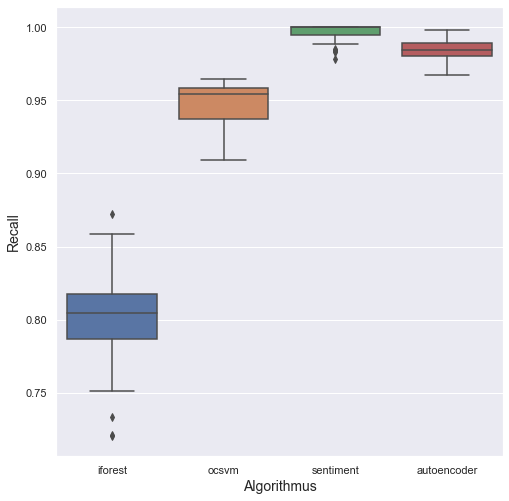

In [11]:
sns.set()
#sns.set_context("paper")

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 8,8.27


bplot = sns.boxplot( data=rec_df )
bplot.set_xlabel("Algorithmus", 
                fontsize=14)
 
bplot.set_ylabel("Recall",
                fontsize=14)

In [12]:
frame = { 'iforest': iforest_metrics["precision"], 
          'ocsvm': ocsvm_metrics["precision"], 
          'sentiment': sentiment_metrics["precision"],
          'autoencoder': autoencoder_metrics["precision"],
        } 
  
prec_df = pd.DataFrame(frame) 
prec_df

,iforest,ocsvm,sentiment,autoencoder
0,0.955975,0.988414,1.000000,0.607438
1,0.910959,0.988372,1.000000,0.591353
2,0.980892,0.985288,1.000000,0.598820
3,0.960784,0.988667,1.000000,0.590411
4,0.958333,0.955445,0.994624,0.593039
...,...,...,...,...
95,0.943038,0.991748,0.994792,0.612857
96,1.000000,0.994798,1.000000,0.575380
97,0.970370,0.993136,1.000000,0.601429
98,0.986928,0.991254,0.994819,0.592641


Text(0, 0.5, 'Precision')

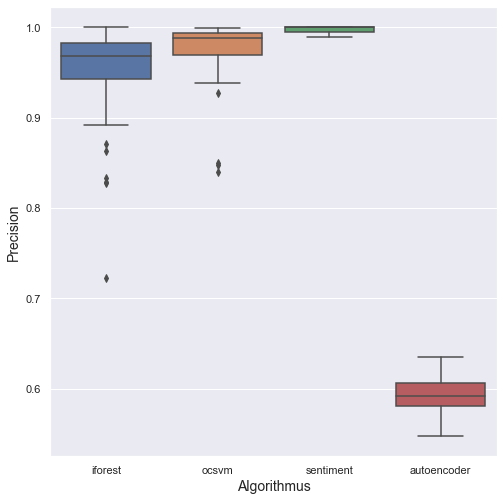

In [13]:
sns.set()
#sns.set_context("paper")

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 8,8.27


bplot = sns.boxplot( data=prec_df )
bplot.set_xlabel("Algorithmus", 
                fontsize=14)
 
bplot.set_ylabel("Precision",
                fontsize=14)

In [14]:
frame = { 'iforest': iforest_metrics["f1_score"], 
          'ocsvm': ocsvm_metrics["f1_score"], 
          'sentiment': sentiment_metrics["f1_score"],
          'autoencoder': autoencoder_metrics["f1_score"]
        } 
  
f1_df = pd.DataFrame(frame) 
#f1_df

Text(0, 0.5, 'F1-Score')

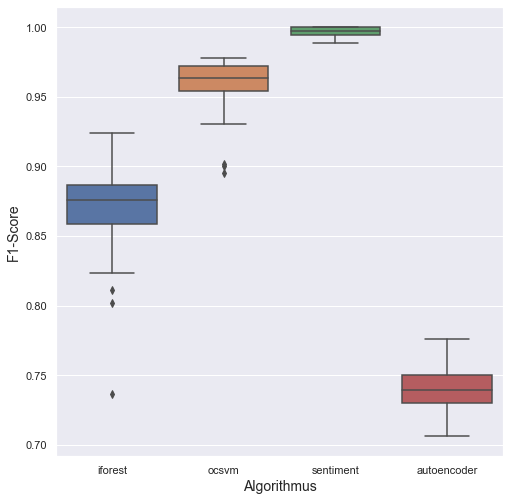

In [15]:
sns.set()
#sns.set_context("paper")

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 8,8.27


bplot = sns.boxplot( data=f1_df )
bplot.set_xlabel("Algorithmus", 
                fontsize=14)
 
bplot.set_ylabel("F1-Score",
                fontsize=14)

In [16]:
frame = { 'iforest': iforest_metrics["auc"], 
          'ocsvm': ocsvm_metrics["auc"],
          'sentiment': sentiment_metrics["auc"],
          'autoencoder': autoencoder_metrics["auc"]
        } 
  
auc_df = pd.DataFrame(frame) 
#auc_df

Text(0, 0.5, 'AUC')

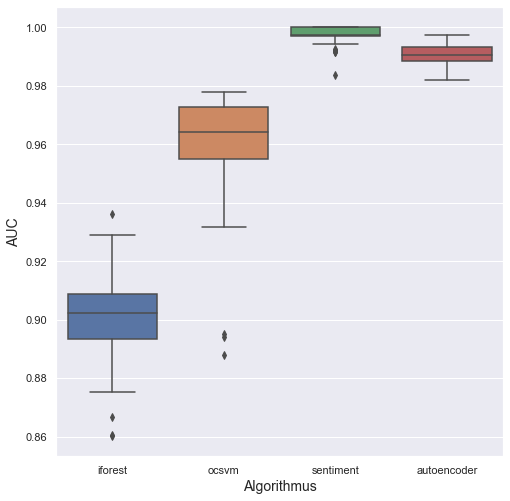

In [17]:
bplot = sns.boxplot( data=auc_df )
bplot.set_xlabel("Algorithmus", 
                fontsize=14)
 
bplot.set_ylabel("AUC",
                fontsize=14)

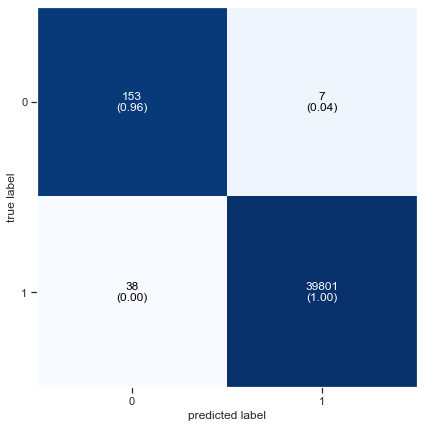

In [18]:
m_df = iforest_metrics

cm = [[int(np.mean(m_df['t_pos'])), int(np.mean(m_df['f_pos']))], 
      [int(np.mean(m_df['f_neg'])), int(np.mean(m_df['t_neg']))]]

binary = np.array(cm)

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False,
                                figsize=(7, 7))

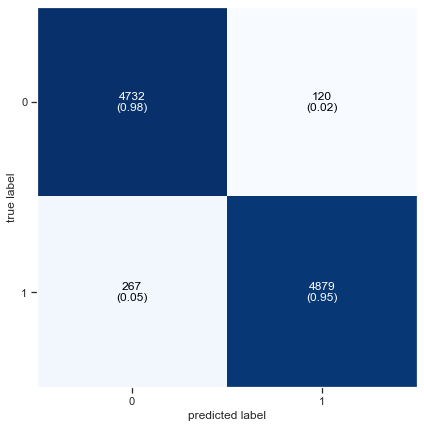

In [19]:
m_df = ocsvm_metrics

cm = [[int(np.mean(m_df['t_pos'])), int(np.mean(m_df['f_pos']))], 
      [int(np.mean(m_df['f_neg'])), int(np.mean(m_df['t_neg']))]]

binary = np.array(cm)

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False,
                                figsize=(7, 7))

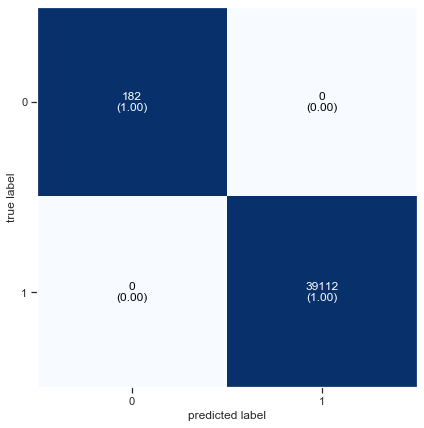

In [20]:
m_df = sentiment_metrics

cm = [[int(np.mean(m_df['t_pos'])), int(np.mean(m_df['f_pos']))], 
      [int(np.mean(m_df['f_neg'])), int(np.mean(m_df['t_neg']))]]

binary = np.array(cm)

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False,
                                figsize=(7, 7))

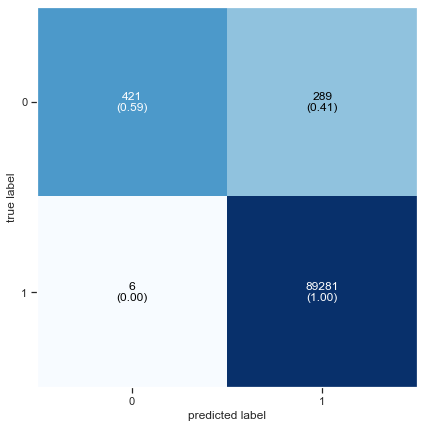

In [21]:
m_df = autoencoder_metrics

cm = [[int(np.mean(m_df['t_pos'])), int(np.mean(m_df['f_pos']))], 
      [int(np.mean(m_df['f_neg'])), int(np.mean(m_df['t_neg']))]]

binary = np.array(cm)

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False,
                                figsize=(7, 7))

In [22]:
np.mean(iforest_metrics["time_to_fit"]), np.mean(ocsvm_metrics["time_to_fit"]), np.mean(sentiment_metrics["time_to_fit"]), np.mean(autoencoder_metrics["time_to_fit"])


(3.5786587420799605, 45.942067638480076, 34.449345407100004, 638.2372420946798)

In [23]:
frame = { 'iforest': iforest_metrics["time_to_fit"], 
         'ocsvm': ocsvm_metrics["time_to_fit"],
         'sentiment': sentiment_metrics["time_to_fit"],
         'autoencoder': autoencoder_metrics["time_to_fit"]
        } 
  
fit_df = pd.DataFrame(frame) 
#fit_df

Text(0, 0.5, 'Seconds per Training-Fit')

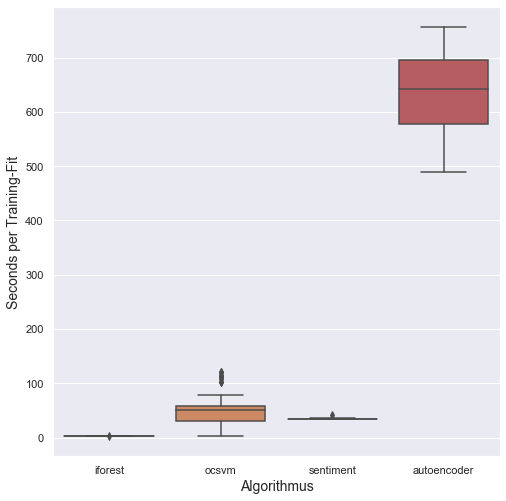

In [24]:
bplot = sns.boxplot( data=fit_df )
bplot.set_xlabel("Algorithmus", 
                fontsize=14)
 
bplot.set_ylabel("Seconds per Training-Fit",
                fontsize=14)

In [25]:
frame = { 'iforest': iforest_metrics["accuracy"], 
         'ocsvm': ocsvm_metrics["accuracy"],
         'sentiment': sentiment_metrics["accuracy"],
         'autoencoder': autoencoder_metrics["accuracy"]
        } 
  
acc_df = pd.DataFrame(frame) 
#acc_df

Text(0, 0.5, 'Accuracy')

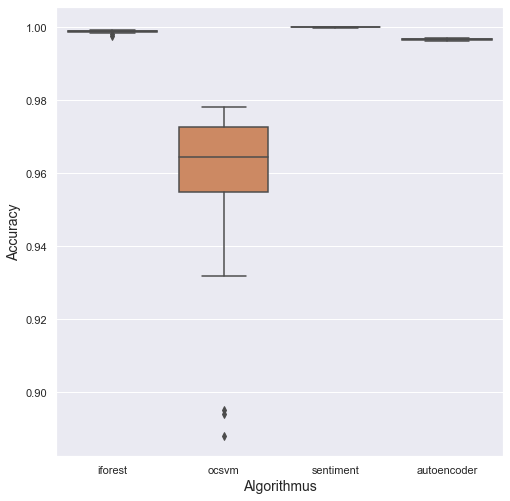

In [26]:
bplot = sns.boxplot( data=acc_df )
bplot.set_xlabel("Algorithmus", 
                fontsize=14)
 
bplot.set_ylabel("Accuracy",
                fontsize=14)